In [1]:
from IPython.display import Image
from IPython.display import HTML
import matplotlib.pyplot as plt
import statistics 
import random as rand
import numpy as np
import numpy.random as npr
import math

# Random Walk

In [144]:
def getProximity(random_variables):
    x1 = random_variables[0]
    x2 = random_variables[1]
    x3 = random_variables[2]
    avg = []
    equation = []
    
    #Forma da equação: ax1 + bx2 + cx3 = b
    equation.append(3*x1 + 2*x2 + 4*x3)
    equation.append(x1 + x2 + 2*x3)
    equation.append(4*x1 + 3*x2 - 2*x3)

    #Calcula a porcentagem de aproximação: (C-Y)/C
    for i in range (3):
        b = i+1
        proximity = abs(b - equation[i])/b
        avg.append(abs(proximity))
    #print(equation)
    return np.mean(avg), random_variables
getProximity([-2.53350280,  4.30000532, -0.0027814314])

(0.06909926091111059, [-2.5335028, 4.30000532, -0.0027814314])

In [3]:
def init_sequence(size):
    i = 0
    #Guarda as médias percentuais da média das 3 equações
    proximity_averages = []
    
    while i < size:
        _sequence = np.random.uniform(-10,10,3)
        sequence = getProximity(_sequence)
        proximity_averages.append(sequence)
        i+=1
    return proximity_averages

In [139]:
def getBestCase(avg_equations,numIterations,bestCase, bestCases):
    
    #Condições de Parada
    #if (bestCase[0] <= 0.10):
     #   return bestCase, bestCases
    if numIterations <= 0:
        return bestCase, bestCases


    '''
    for i in range (50):
        aux = avg_equations[i]
        if 1-abs(aux[0]) > 1-abs(bestCase[0]) and 0.89<aux[0]<=1.:
            bestCase = aux
    '''
    #Retira os 50% piores casos
    avg_equations.sort()
    #print(avg_equations[0], avg_equations[-1])
    for i in range(25,50):
        avg_equations.pop()
        
    avg_equations += init_sequence(25)
    bestCase = avg_equations[0]
    bestCases.append(bestCase[0])

    return getBestCase(avg_equations,numIterations-1,bestCase, bestCases)

## Plot da média do percentual de aproximação das melhores sequências por iteração

Execucao: 1
Taxa de erro: 12.83 %
Taxa de proximidade: 87.17 %
Sequencia utilizada: [-2.33873518  4.03444746 -0.04653361] 

Execucao: 2
Taxa de erro: 4.75 %
Taxa de proximidade: 95.25 %
Sequencia utilizada: [-2.52295494  4.33718249 -0.0296503 ] 

Execucao: 3
Taxa de erro: 9.82 %
Taxa de proximidade: 90.18 %
Sequencia utilizada: [-2.74787952  4.79058547 -0.09293427] 

Execucao: 4
Taxa de erro: 9.27 %
Taxa de proximidade: 90.73 %
Sequencia utilizada: [-2.85349755  4.79822813 -0.05169896] 

Execucao: 5
Taxa de erro: 8.52 %
Taxa de proximidade: 91.48 %
Sequencia utilizada: [-2.63219642  4.49279642 -0.05146338] 



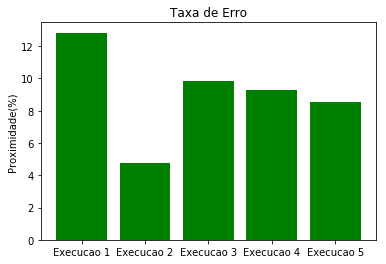

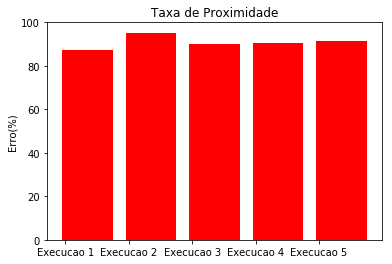

In [149]:

numIterations = 10000
i = 0
j = 0

best_results = []
proximity_rate = []
error_rate = []
bar_width = 0.35
index = np.arange(5)
execucoes = ['execucao 1','execucao 2','execucao 3','execucao 4','execucao 5']
import sys
sys.setrecursionlimit(numIterations*10)
media_por_iteracao = np.empty((5,numIterations))
for i in range(5):
    #Inicia 50 sequências de valores aleatórios num intervalo [-10,10]
    avg_equations = init_sequence(50)
    avg_equations.sort()

    #A melhor solução será o primeiro elemento da lista, pós-ordenado.
    bestCase = avg_equations[0]

    melhor, melhores = getBestCase(avg_equations,numIterations, bestCase, [])
    best_results.append(melhor)
    media_por_iteracao[i] = melhores
    perc = best_results[i][0] * 100
    error = 100-perc
    
    #Armazena em proximity_rate os melhores percentuais de aproximação de cada execução.
    proximity_rate.append(perc)
    error_rate.append(error)
    print("Execucao:", (i + 1))
    print("Taxa de erro:",round(perc,2),"%")
    print("Taxa de proximidade:",round(error,2),"%")
    print("Sequencia utilizada:",best_results[i][1],"\n")
    

proximidade = plt.bar(index,proximity_rate,width=0.8,color='green')
plt.title('Taxa de Erro')
plt.ylabel('Proximidade(%)')
plt.xticks(index,('Execucao 1','Execucao 2','Execucao 3','Execucao 4','Execucao 5'))

f, ax = plt.subplots()

error = plt.bar(index+bar_width,error_rate,width=0.8, color='red')
plt.title('Taxa de Proximidade')
plt.ylabel('Erro(%)')
plt.xticks(index,('Execucao 1','Execucao 2','Execucao 3','Execucao 4','Execucao 5'))
plt.show()




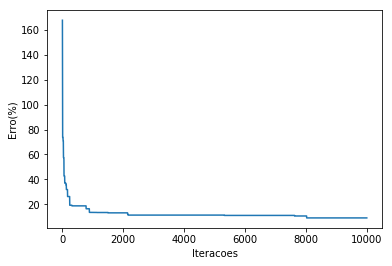

In [155]:
media = plt.plot(100*media_por_iteracao.mean(axis=0))
plt.xlabel('Iteracoes')
plt.ylabel('Erro(%)')
plt.show()

## Calcular a média e o desvio padrão dos percentuais de aproximação considerando a melhor sequência das 5 execuções.

Media: 9.04 %
Desvio Padrão : 2.6 %


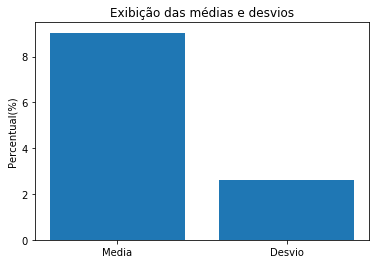

In [151]:
# Média e Desvio Padrão para 5 Execuções.

average = [x[0] for x in best_results]
average_ = round(np.mean(average)*100,2)
deviation_ = round(np.std(average)*100,2)
print("Media:", average_, '%')
print("Desvio Padrão :", deviation_, '%')
cases_array = [average_,deviation_]

cases = ['Media','Desvio']
plt.bar(cases,cases_array)
plt.title('Exibição das médias e desvios')
plt.ylabel('Percentual(%)')
plt.show()

## Comparar as soluções encontradas por força bruta e a solução exata

In [152]:
#Resultado real.
x = np.linalg.solve([ [3, 2, 4], [1, 1, 2], [4, 3, -2] ],[ 1, 2, 3 ])
print(x)

#Calcula a disparidade das execucoes ao resultado exato.
results = [x[1] for x in best_results]
final_avg = []
for i in range (5):
	individual_avg = []
	for j in range (0,3):
        #Verifica cada variável x e compara o grau de proximidade entre as variáveis exatas.
		proximity = (results[i][j]) - x[j]/results[i][j]
		individual_avg.append(abs(proximity))
	final_avg.append(np.mean(individual_avg))

print("Aproximação de todas execucoes com o resultado verdadeiro:",round(np.mean(final_avg),2),'%')

[-3.  5.  0.]
Aproximação de todas execucoes com o resultado verdadeiro: 2.4 %
